## Exploratory Analysis

In [4]:
%%writefile 'C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import streamlit as st
import StreamlitCustomLibrary as at_lib

at_lib.SetPageConfig()
at_lib.SetTheme()

st.header('Análise exploratória',divider=True)

df_steam = pd.read_csv('SteamDatasetForStreamlitClean.csv',engine='pyarrow')

st.dataframe(df_steam.describe())

nCols = ['total_duration','total_achievements','total_supported_languages','positive_reviews_percent','price', 'self_published_percent','commercialization_days']

st.divider()

fig, ax = plt.subplots(figsize=(10,5))
sb.histplot(df_steam,x=df_steam['type'], hue=df_steam['type'],ax=ax, alpha=1.0,shrink=0.85)

st.pyplot(fig)

fig, ax = plt.subplots(figsize=(15, 5))

df_steam_corr = df_steam[nCols+].corr()
sb.heatmap(df_steam_corr, annot=True, fmt='.2f', ax=ax, mask=np.triu(df_steam_corr, k=1))

st.pyplot(fig)

st.divider()

fig, axs = plt.subplots(3,3,figsize=(15, 10))


for index, col in enumerate(nCols):
    sb.regplot(data=df_steam, x=col, y='total_reviews', ax=axs[index//3, index%3], line_kws={'color':'red'})
plt.subplots_adjust(wspace=0.3, hspace=0.3)

st.pyplot(fig)

st.divider()

fig, ax = plt.subplots(figsize=(15, 5))
sb.boxplot(data=df_steam[nCols], ax=ax)

st.pyplot(fig)



Overwriting C:\Users\leoni\OneDrive\Documentos\AT_Projeto_Bloco_Streamlit\ExploratoryAnalysis.py


f:\Anaconda\envs\INFNET_II\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
f:\Anaconda\envs\INFNET_II\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
f:\Anaconda\envs\INFNET_II\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
f:\Anaconda\envs\INFNET_II\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

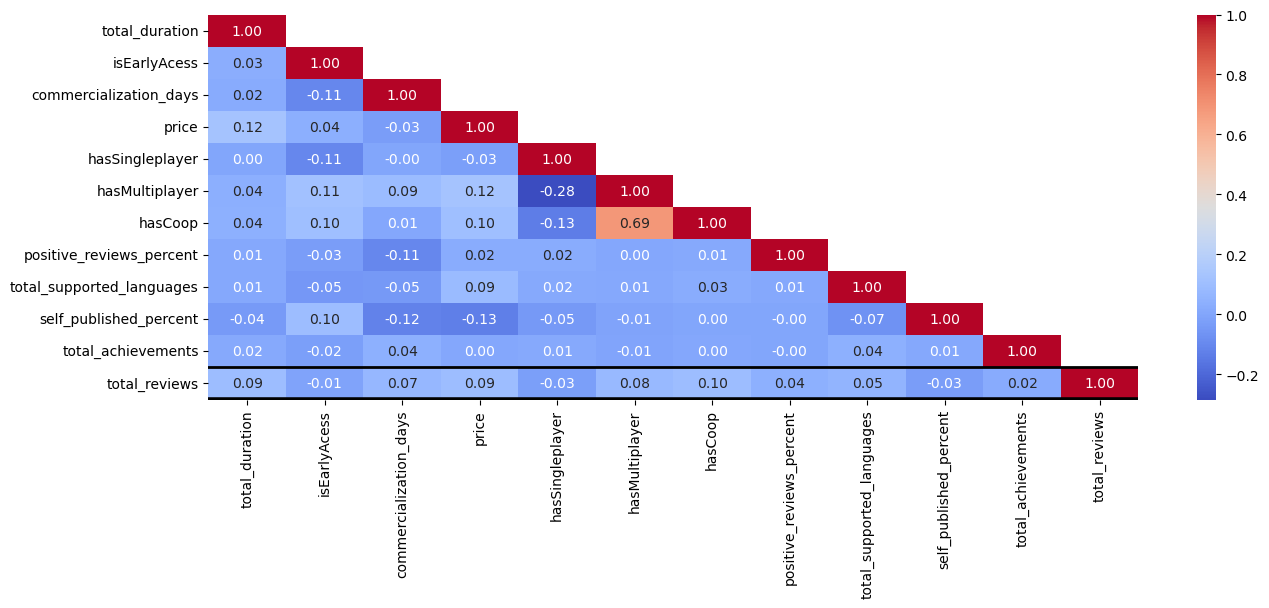

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

df_steam = pd.read_csv('C:\\Users\\leoni\OneDrive\\Documentos\\AT_Projeto_Bloco_Streamlit\\SteamDatasetForStreamlitClean.csv',engine='pyarrow')


nCols = ['total_duration','total_achievements','total_supported_languages','positive_reviews_percent','price', 'self_published_percent',
         'commercialization_days']

#print(df_steam.info())

#fig, ax = plt.subplots(figsize=(10,5))
#sb.boxplot(df_steam,ax=ax)

#plt.show()


fig, ax = plt.subplots(figsize=(15, 5))

df_steam_numerics = df_steam.drop(columns=['name','id','release_date','tags','main_genre',''])

nOrder = list(df_steam_numerics.columns)
nOrder.remove('total_reviews')
nOrder.append('total_reviews')

df_steam_numerics = df_steam_numerics[nOrder]
#df_steam_numerics['total_reviews'] = np.log(df_steam_numerics['total_reviews'])

#df_steam_numerics['total_reviews'] = df_steam_numerics['total_reviews']/1000
#print(df_steam_numerics.describe())
scaler = MinMaxScaler()

df_rescaled = pd.DataFrame(scaler.fit_transform(df_steam_numerics), columns=df_steam_numerics.columns)

#for col in df_steam_numerics.columns:
#    if (col == 'total_reviews'):
#        continue
#    df_steam_numerics[col] = scaler.fit_transform(df_steam_numerics[[col]])

df_steam_corr = df_rescaled.corr()
sb.heatmap(df_steam_corr, annot=True, fmt='.2f',cmap=sb.color_palette("coolwarm", as_cmap=True), ax=ax, mask=np.triu(df_steam_corr, k=1))
ax.axhline(11, color='black', linewidth=2)
ax.axhline(12, color='black', linewidth=4)

plt.show()

<Axes: >

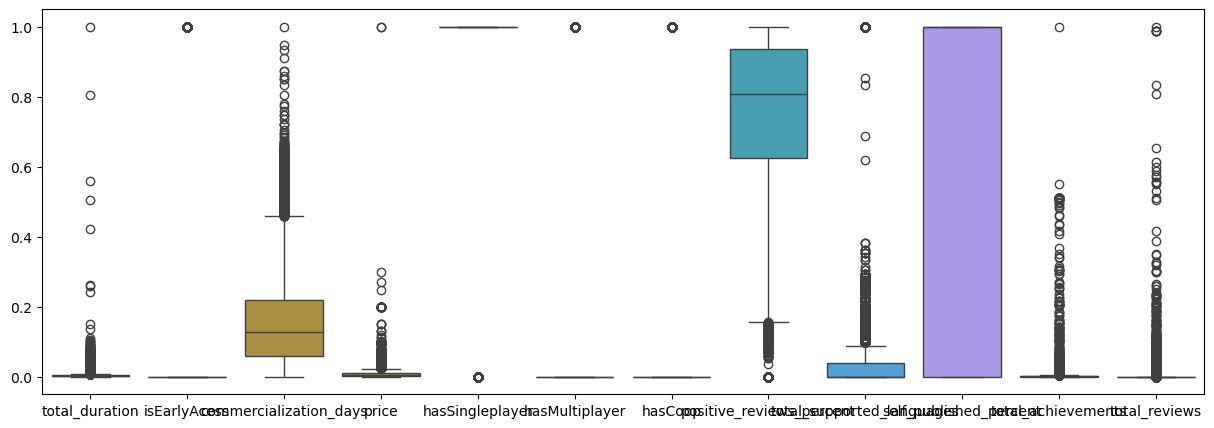

In [35]:
fig, ax = plt.subplots(figsize=(15, 5))

sb.boxplot(data=df_rescaled, ax=ax)

IndexError: index 3 is out of bounds for axis 0 with size 3

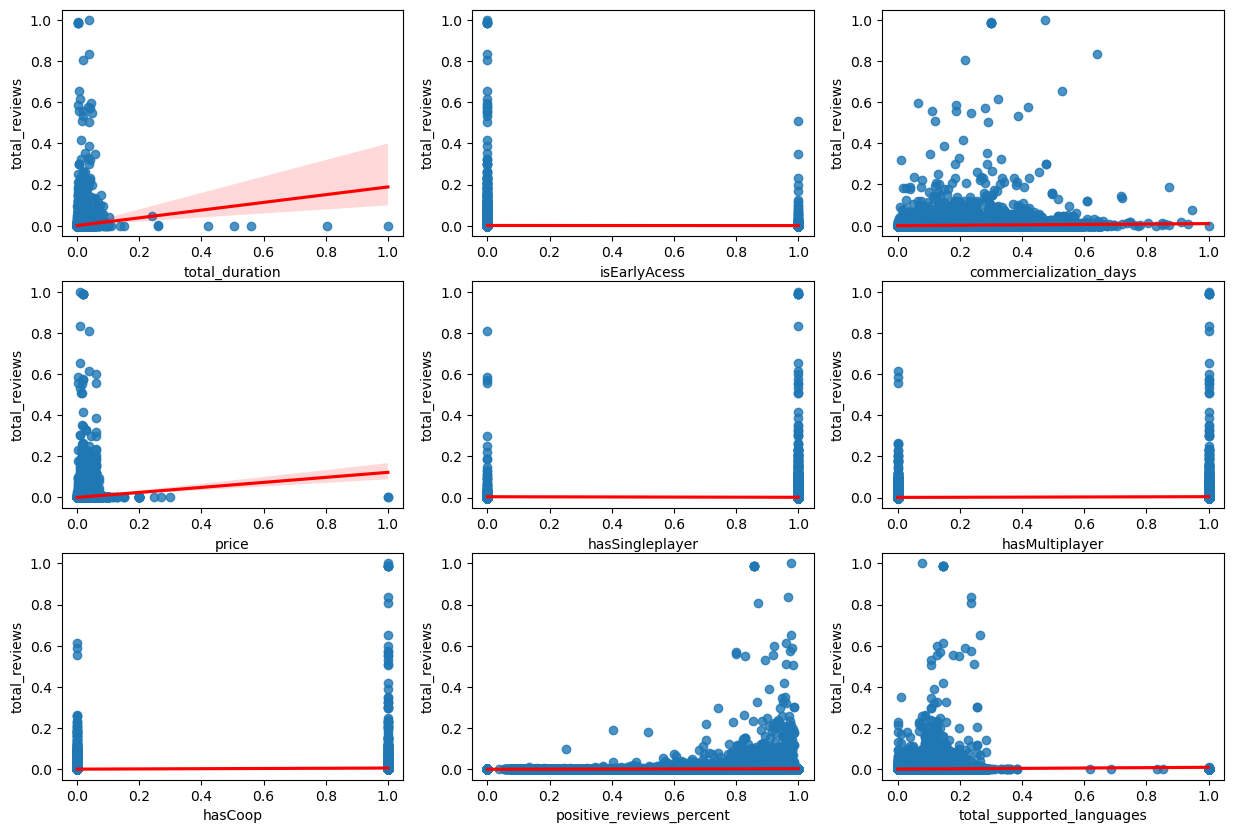

In [36]:
fig, axs = plt.subplots(3,3,figsize=(15, 10))


for index, col in enumerate(df_rescaled.columns):
    if (col == 'total_reviews'):
        continue
    sb.regplot(data=df_rescaled, x=col, y='total_reviews', ax=axs[index//3, index%3], line_kws={'color':'red'})
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [33]:
df_rescaled.describe()

,total_duration,isEarlyAcess,commercialization_days,price,hasSingleplayer,hasMultiplayer,hasCoop,positive_reviews_percent,total_supported_languages,self_published_percent,total_achievements,total_reviews
count,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000
mean,0.004233,0.104099,0.149589,0.008831,0.969144,0.183115,0.097063,0.745624,0.034246,0.704849,0.002605,0.001250
std,0.008158,0.305391,0.112751,0.012691,0.172929,0.386764,0.296046,0.246606,0.100938,0.451482,0.020771,0.016534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001879,0.000000,0.059129,0.002491,1.000000,0.000000,0.000000,0.625000,0.000000,0.000000,0.000000,0.000005
50%,0.002495,0.000000,0.127923,0.005493,1.000000,0.000000,0.000000,0.806452,0.000000,1.000000,0.000713,0.000019
75%,0.004198,0.000000,0.219162,0.010495,1.000000,0.000000,0.000000,0.937500,0.039216,1.000000,0.002240,0.000102
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df_steam_numerics.describe()

,total_duration,commercialization_days,price,positive_reviews_percent,total_supported_languages,self_published_percent,total_achievements,total_reviews
count,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000,57849.000000,5.784900e+04
mean,5.687741,1443.499697,9.326459,0.745624,4.493129,0.704849,25.582015,1.512443e+03
std,10.922471,1085.001509,12.684810,0.246606,10.295687,0.451482,203.995928,2.001080e+04
min,0.020000,4.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,2.535000,573.000000,2.990000,0.625000,1.000000,0.000000,0.000000,6.000000e+00
50%,3.360000,1235.000000,5.990000,0.806452,1.000000,1.000000,7.000000,2.300000e+01
75%,5.640000,2113.000000,10.990000,0.937500,5.000000,1.000000,22.000000,1.240000e+02
max,1338.810000,9627.000000,1000.000000,1.000000,103.000000,1.000000,9821.000000,1.210252e+06


<Axes: ylabel='price'>

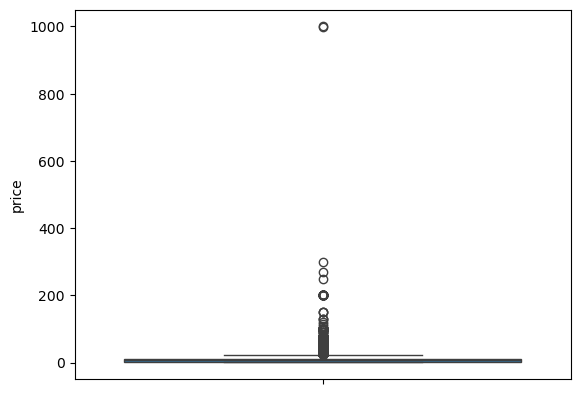

In [37]:
sb.boxplot(df_steam['price'])

In [42]:
df_steam[df_steam['price'] >70][['price','name','id']]

,price,name,id
10,199.99,Impossible Stunts,2471600.0
11,199.99,Fly Fly Dragon!,2471620.0
694,99.99,Bike Offroad Simulator,2400760.0
767,99.99,Last Day of Zombies,2394600.0
768,99.99,Destroy All Zombies,2394610.0
...,...,...,...
57090,99.99,Fire Truck Simulator,2018850.0
57485,199.99,Spooky Men,2204850.0
57583,269.99,Houdini Indie,502570.0
57752,79.99,SCARLET NEXUS,775500.0


In [43]:
df_steam[df_steam['name'] == "Houdini Indie"]

,,name,id,release_date,tags,total_duration,main_genre,isEarlyAcess,commercialization_days,price,hasSingleplayer,hasMultiplayer,hasCoop,total_reviews,positive_reviews_percent,total_supported_languages,self_published_percent,total_achievements
57583,178639,Houdini Indie,502570.0,2018-10-10,"['Animation & Modeling', 'Game Development', '...",2.535,Others,False,1855,269.99,False,False,False,190.0,0.952632,1,1.0,0.0


In [48]:
#df_steam[df_steam['tags'].conta(['Game Development'])]
df_steam['contains_my_string'] = df_steam['tags'].apply(lambda x: 'Game Development' in x)
df_steam[df_steam['contains_my_string'] == True][['name','id','tags']]

,name,id,tags
510,HOLEHOLE,2417490.0,"['Adventure', 'Visual Novel', 'Walking Simulat..."
715,POLYGON游戏编辑器,2398010.0,"['Casual', 'Game Development', 'Simulation', '..."
897,Games for Stream!,2538580.0,"['Early Access', 'Time Management', 'Trading C..."
964,Platform Game Maker,2530050.0,"['Game Development', 'Casual', '2D Platformer'..."
1206,Shooting Game Builder,2492380.0,"['Utilities', 'Game Development']"
...,...,...,...
57583,Houdini Indie,502570.0,"['Animation & Modeling', 'Game Development', '..."
57630,GameGuru MAX,1247290.0,"['Game Development', 'Utilities', 'Design & Il..."
57663,Alive Cursor,1606490.0,"['Utilities', 'Game Development', 'Dark Humor'..."
57687,Software Inc.,362620.0,"['Early Access', 'Management', 'Immersive Sim'..."


In [53]:
df_steam['contains_my_string'] = df_steam['tags'].apply(lambda x: 'Software' in x)
df_steam[df_steam['contains_my_string'] == True][['name','id','tags']]

TypeError: argument of type 'NoneType' is not iterable

- Mudar ID para inteiro df_steam['id'].astype(int)
- Mudar release date para dateType
- Mudar total_reviews para inteiro
- Mudar total_achievements par ainteiro

In [79]:
df_steam = pd.read_csv('C:\\Users\\leoni\OneDrive\\Documentos\\AT_Projeto_Bloco_Streamlit\\SteamDatasetForStreamlit.csv',engine='pyarrow')

In [90]:
list(df_steam[df_steam['name'] == "Houdini Indie"]['tags'])

["{'Animation & Modeling': 62, 'Game Development': 59, '3D': 41, 'Design & Illustration': 38, 'Indie': 22, 'Video Production': 21, 'Procedural Generation': 15}"]

In [80]:
df_steam.drop(df_steam[df_steam['scrap_status'] != 'Scrap_Sucess'].index,inplace=True)
df_steam.drop(df_steam[df_steam['type'] != 'game'].index,inplace=True)

In [81]:
import ast

def formatCategorie(c):
    try:
        return len(ast.literal_eval(c))
    except:
        return ''

df_steam['categories'] =  df_steam['categories'].apply(lambda x: formatCategorie(x))

In [85]:
df_steam[(df_steam['categories'] == '') & (df_steam['name'].apply(lambda n: 'Playtest' not in n if n != None else True))][['name','steam_appid','categories']]

,name,steam_appid,categories
310,Cursor Engine,2468390.0,
344,FBX2SPINE - 3D Mocap to 2D Animation Transfer ...,2467960.0,
546,Stream Environments: Cat Cafe,2463760.0,
617,QualityScaler,2463110.0,
1324,Acidic Pro,2450380.0,
...,...,...,...
178670,Fuse,257400.0,
178702,VEGAS 19 Edit Steam Edition,1698340.0,
178813,Captain Gazman Day Of The Rage - Development Beta,2077300.0,
178816,Powder,1794970.0,


## Tags proibidas


- 'Animation & Modeling'
- 'Game Development'
- 'Design & Illustration'
- 'Video Production'
- 'Utilities'
- 'Photo Editing'
- 'Software'